In [1]:
%matplotlib inline
import sys
sys.path.append("..") # Adds the module to path

# deeptrack.scatterers

This example introduces the module deeptrack.scatterers

## What is a scatterer?

Scatterers are implementations of the abstract class `Feature` that represent scattering objects (see also [features_example](features_example.ipynb)). When calculating the scattered field, they are discretized into voxels.

All physcial properties of scatterers are given in SI units, unless otherwise stated. In particular, the position of a scatterer is measured from the top left corner of the image and can either be given in meters (default) or pixels by setting the property `position_unit` to `"meter"` or `"pixel"`. The z-position of the particle can either be set as the the third element of the property `position`, or as the property `z`. The calculation of a scatterer is automatically upsampled using the `upsample` property.

All scatterers need a reference to the optical system through which they are viewed in order to calculate scale factors. This is achieved by calling an optical device from the `optics` module (see also [optics_example](optics_example.ipynb)) with the scatterer. 

## 1. Setup 

We import the required modules and create a optical device `optics` to view scatterers through, in this case a fluorescence microscope implemented by `Fluorescence`.

In [2]:
from deeptrack.optics import Fluorescence

import numpy as np
import matplotlib.pyplot as plt

optics = Fluorescence(
    NA=0.7,
    wavelength=680e-9,
    resolution=1e-6,
    magnification=10,
    output_region=(0, 0, 64, 64)
)

## 2. PointParticle

The feature `PointParticle` resolves an object occupying a single voxel, which corresponds to a point (dipolar) scatterer.

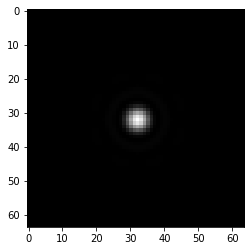

In [3]:
from deeptrack.scatterers import PointParticle

scatterer = PointParticle(
    intensity=100,          # Squared magnitude of the field
    position_unit="pixel",  # Units of position (default meter)
    position=(32, 32),      # Position of the particle 
)

imaged_scatterer = optics(scatterer)

imaged_scatterer.plot(cmap="gray")

## 3. Ellipse 

The feature `Ellipse` resolves a 2-dimensional elliptical disk, whose principal axes are in the xy-plane.

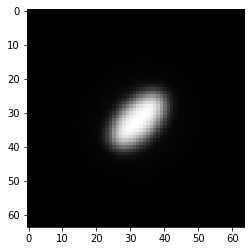

In [4]:
from deeptrack.scatterers import Ellipse

scatterer = Ellipse(
    intensity=100,          # Squared magnitude of the field
    position_unit="pixel",  # Units of position (default meter)
    position=(32, 32),      # Position of the particle
    radius=(1e-6, 0.5e-6),  # Dimensions of the principal axes of the ellipse
    rotation=np.pi / 4,     # Amount the ellipse is rotated by in radians
    upsample=4              # Amount the resolution is upsampled for accuracy
)

imaged_scatterer = optics(scatterer)

imaged_scatterer.plot(cmap="gray")

## 4. Sphere

The feature `Sphere` resolves a 3-dimensional sphere.

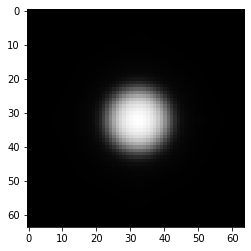

In [5]:
from deeptrack.scatterers import Sphere

scatterer = Sphere(
    intensity=100,          # Squared magnitude of the field
    position_unit="pixel",  # Units of position (default meter)
    position=(32, 32),      # Position of the particle
    radius=1e-6,            # Radius of the sphere
    upsample=4              # Amount the resolution is upsampled for accuracy
)

imaged_scatterer = optics(scatterer)

imaged_scatterer.plot(cmap="gray")

## 5. Ellipsoid

The feature `Ellipsoid` resolves a 3-dimensional ellipsoid.

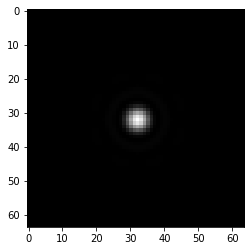

In [6]:
from deeptrack.scatterers import Ellipsoid

scatterer = Ellipsoid(
    intensity=100,                  # Squared magnitude of the field
    position_unit="pixel",          # Units of position (default meter)
    position=(32, 32),              # Position of the particle
    radius=(1e-6, 0.5e-6, 0.25e-6), # Dimensions of the principal axes of the ellipsoid
    rotation=(np.pi/4, 0, 0),       # Amount the ellipsoid is rotated by in radians
    upsample=4                      # Amount the resolution is upsampled for accuracy
)

imaged_scatterer = optics(scatterer)

imaged_scatterer.plot(cmap="gray")